In [209]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
from statistics import mean
import math as m

# Calculating the mean amount of co-contraction for flex and ex with no FB vs with FB, TTA users

By definition 

Co-contraction = delta_M1M2 =< 20 and M1<20 and M2<20

In [212]:
def normalise(signal1, signal2, MVC_M1_SCALED, MVC_M2_SCALED):
    ''' 
    A function that normalises the raw EMG signals for muscle 1 and 2
    outputs the normalised muscle contraction values for m1 and m2
    '''
    s1_normal = int(signal1/MVC_M1_SCALED *100)
    s2_normal = int(signal2/MVC_M2_SCALED *100)
    return s1_normal, s2_normal


def find_flex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during flexion
    '''
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg2[i] > emg1[i]:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y


def find_ex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during extension
    '''
    ex_x = []
    ex_y = []
    for i in range(len(emg2)):
        if emg1[i] > emg2[i]:
            ex_x.append(emg1[i])
            ex_y.append(emg2[i])
    return ex_x, ex_y


# TTA: 1

In [213]:
# MVC,142,MVC,195

MVC_M1 = 142
MVC_M2 = 195
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Markus_raw_nofeedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                delta_emg = abs(M1_norm-M2_norm)
                if delta_emg <=20 and M1_norm > 20 and M2_norm > 20:
                    emg1_norm.append(M1_norm)
                    emg2_norm.append(M2_norm)


with open('EMG_Users\Markus_raw_feedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                delta_emg = abs(M1_norm_feed-M2_norm_feed)
                if delta_emg <=20 and M1_norm_feed > 20 and M2_norm_feed > 20:
                    emg1_norm_feed.append(M1_norm_feed)
                    emg2_norm_feed.append(M2_norm_feed)

no feedback

flex data
[130, 125, 123, 125, 125, 125, 125, 122, 110, 110]
[134, 140, 139, 135, 135, 135, 135, 123, 112, 112]
ex data
[139, 139, 135, 135, 135, 105, 27, 27, 36]
[120, 126, 129, 129, 129, 95, 22, 22, 24]
TTA 1 no feedback
Mean magnitude of flexion: 178.2806775845324
Mean magnitude of extension: 131.67955867498762
Total mean magnitude of co-contraction: 156.20632943441151


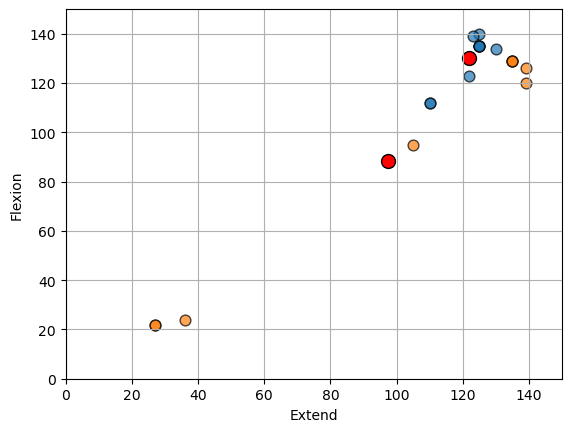

In [214]:
# print("EMG M1")
# print(emg1_norm)
# print("EMG M2")
# print(emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)

ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)

# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)

total_mean_x = mean(emg1_norm)
total_mean_y = mean(emg2_norm)

print("flex data")
print(flex_x)
print(flex_y)

print("ex data")
print(ex_x)
print(ex_y)


# plt.scatter(emg1_norm, emg2_norm, s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(flex_x, flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(ex_x, ex_y, s=60, alpha=0.7, edgecolors="k")


# mean magnitude for flex and extension
TTA1_mean_mag_flex = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
TTA1_mean_mag_ex = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
TTA1_total_mean = m.sqrt(total_mean_x**2 + total_mean_y**2)


print("TTA 1 no feedback")
print(f"Mean magnitude of flexion: {TTA1_mean_mag_flex}")
print(f"Mean magnitude of extension: {TTA1_mean_mag_ex}")
print(f"Total mean magnitude of co-contraction: {TTA1_total_mean}")


plt.xlim(0,150)
plt.ylim(0,150)
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

with feedback

flex data
[24, 26, 29, 29, 65, 65, 62, 61, 64, 64, 66, 67, 71, 71, 73, 76, 76, 75, 75, 73, 73, 72, 70, 70, 71, 71, 71, 69, 69, 68, 66, 66, 63, 63, 55, 55, 49, 119, 119, 119, 92, 92, 97, 97, 97, 95, 95, 95, 93, 80, 74, 74, 66]
[44, 30, 42, 42, 70, 70, 71, 73, 75, 75, 77, 78, 77, 77, 78, 77, 77, 78, 78, 80, 80, 86, 88, 88, 90, 90, 90, 81, 81, 80, 78, 78, 78, 78, 69, 69, 54, 128, 128, 128, 105, 105, 101, 101, 101, 104, 106, 106, 109, 95, 77, 77, 80]
ex data
[35, 35, 46, 32, 39, 39, 45, 53, 51, 49, 49, 47, 71, 71, 73, 73, 73, 80, 80, 80, 80, 80, 78, 78, 80, 81, 83, 83, 82, 82, 82, 80, 80, 76, 76, 45, 45, 41, 114, 113, 113, 95, 29, 37, 49, 49, 47, 40, 40, 110, 110, 102, 71, 89, 89, 89, 89, 60, 56]
[22, 22, 26, 24, 29, 29, 29, 35, 35, 32, 32, 28, 52, 52, 60, 60, 60, 68, 68, 73, 69, 68, 68, 68, 69, 68, 68, 68, 70, 66, 66, 68, 68, 69, 69, 41, 41, 30, 98, 108, 108, 83, 28, 29, 29, 29, 27, 22, 22, 96, 96, 100, 60, 86, 86, 86, 86, 58, 39]
TTA 1 with feedback
Mean magnitude of flexion: 109.8389594

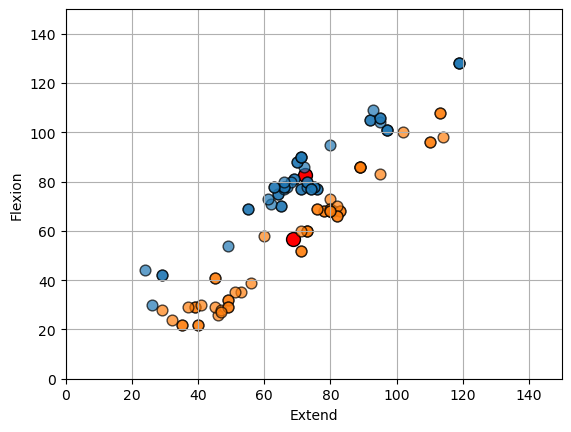

In [215]:

# taking only for the flexion and then extension, normalised with FB
flex_x, flex_y = find_flex_data(emg1_norm_feed, emg2_norm_feed)

ex_x, ex_y = find_ex_data(emg1_norm_feed, emg2_norm_feed)

# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)

total_mean_x = mean(emg1_norm_feed)
total_mean_y = mean(emg2_norm_feed)

print("flex data")
print(flex_x)
print(flex_y)

print("ex data")
print(ex_x)
print(ex_y)


# plt.scatter(emg1_norm_feed, emg2_norm_feed, s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(flex_x, flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(ex_x, ex_y, s=60, alpha=0.7, edgecolors="k")

# mean magnitude for flex and extension
TTA1_mean_mag_flex_feed = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
TTA1_mean_mag_ex_feed = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
TTA1_total_mean_feed = m.sqrt(total_mean_x**2 + total_mean_y**2)

print("TTA 1 with feedback")
print(f"Mean magnitude of flexion: {TTA1_mean_mag_flex_feed}")
print(f"Mean magnitude of extension: {TTA1_mean_mag_ex_feed}")
print(f"Total mean magnitude of co-contraction: {TTA1_total_mean_feed}")


TTA1_magnitude_feed = calc_magnitude(emg1_norm_feed, emg2_norm_feed)


plt.xlim(0,150)
plt.ylim(0,150)
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

# TTA: 2

In [216]:
# MVC,231,MVC,231

MVC_M1 = 231
MVC_M2 = 231
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Gummi_raw_nofeedback_minus2rst.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')
        line_count = 0
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                delta_emg = abs(M1_norm-M2_norm)
                if delta_emg <= 20 and M1_norm > 20 and M2_norm > 20:
                    emg1_norm.append(M1_norm)
                    emg2_norm.append(M2_norm)


with open('EMG_Users\Gummi_raw_feedback_minus2rst.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')
        line_count = 0
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                delta_emg =  abs(M1_norm_feed-M2_norm_feed)             
                if delta_emg <=20 and M1_norm_feed > 20 and M2_norm_feed > 20:
                        emg1_norm_feed.append(M1_norm_feed)
                        emg2_norm_feed.append(M2_norm_feed)

No feedback

flex data
[22, 29, 24, 23, 21, 21, 22, 25, 25, 27, 25, 27, 28, 28, 23, 23, 24, 24, 24, 21, 21, 24, 21, 21, 21]
[30, 35, 28, 35, 40, 25, 33, 28, 28, 38, 27, 37, 48, 48, 28, 28, 28, 35, 42, 27, 27, 38, 25, 28, 34]
ex data
[39, 41, 42, 42, 42, 42, 42, 41, 41, 42, 43, 44, 44, 45, 47, 50, 52, 52, 54, 54, 37, 37, 40, 42, 43, 43, 45, 49, 51, 54, 54, 54, 53, 50, 47, 47, 41, 34, 43, 41, 41, 36, 48, 47, 47, 44, 42, 42, 40, 37, 37, 32, 25, 25, 46, 44, 42, 44, 44, 45, 41, 27, 36, 43, 43, 39, 39, 40, 41, 41, 43, 44, 44, 44, 44, 44, 42, 42, 42, 43, 43, 42, 42, 39, 37, 57, 56, 56, 34, 34, 34, 34, 34, 34, 37, 37, 37, 36, 36, 36, 36, 36, 36, 35, 35, 36, 36, 40, 41, 42, 42, 44, 45, 45, 49, 49, 49, 49, 48, 48, 47, 45, 45, 48, 40, 39, 39, 39, 37, 37, 36, 24, 24, 22, 38, 38, 38, 38, 40, 40, 41, 44, 47, 47, 40, 53, 30, 38, 41, 41, 49, 41, 41, 42, 44, 44, 44, 59, 60, 63, 63, 33, 33, 38, 42, 42, 41]
[21, 23, 25, 25, 26, 26, 27, 28, 28, 29, 30, 31, 31, 31, 31, 32, 32, 32, 34, 34, 23, 23, 27, 30, 34, 34, 37, 38

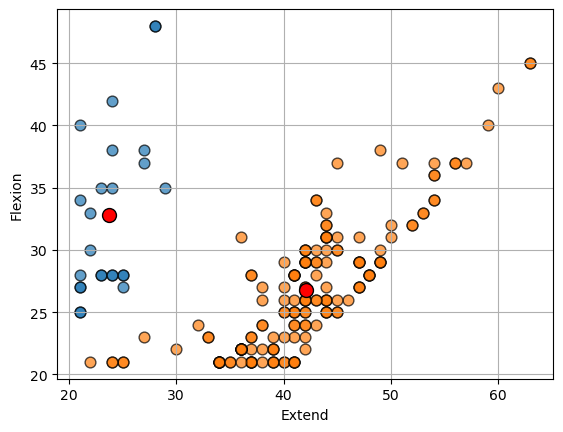

In [217]:
flex_x, flex_y = find_flex_data(emg1_norm, emg2_norm)

ex_x, ex_y = find_ex_data(emg1_norm, emg2_norm)

# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)

total_mean_x = mean(emg1_norm)
total_mean_y = mean(emg2_norm)

print("flex data")
print(flex_x)
print(flex_y)

print("ex data")
print(ex_x)
print(ex_y)

# plt.scatter(emg1_norm, emg2_norm, s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(flex_x, flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(ex_x, ex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)

# mean magnitude for flex and extension
TTA2_mean_mag_flex = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
TTA2_mean_mag_ex = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
TTA2_total_mean = m.sqrt(total_mean_x**2 + total_mean_y**2)


print("TTA 2 no feedback")
print(f"Mean magnitude of flexion: {TTA2_mean_mag_flex}")
print(f"Mean magnitude of extension: {TTA2_mean_mag_ex}")
print(f"Total mean magnitude of co-contraction: {TTA2_total_mean}")


# plt.xlim(0,150)
# plt.ylim(0,150)
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

With feedback

flex data
[24, 24, 22, 28, 43, 35, 35, 31, 31, 31, 31, 35, 35, 45, 22, 22, 23, 27, 27, 27, 23, 23, 21, 24, 25, 22, 22, 23, 22, 22, 21, 21]
[34, 34, 25, 31, 44, 47, 47, 49, 49, 49, 49, 51, 51, 52, 28, 28, 40, 31, 40, 31, 36, 36, 27, 25, 37, 29, 29, 37, 23, 23, 34, 34]
ex data
[41, 41, 41, 41, 37, 44, 44, 49, 58, 58, 58, 66, 57, 57, 68, 30, 30, 30, 22, 63, 65, 66, 42, 42, 42, 43, 44, 47, 47, 57, 49, 49, 49, 47, 45, 44, 44, 42, 42, 41, 41, 51, 52, 53, 53, 54, 54, 54, 40, 40, 42, 47, 47, 27, 27, 38, 36, 32, 32, 24, 24, 37, 47, 47, 42, 42, 42, 39, 45, 45, 50, 54, 55, 55, 37, 40, 40, 38, 38, 53, 52, 52, 50, 51, 51, 50, 50, 49, 48, 49, 49, 50, 50, 35, 35, 38]
[22, 22, 22, 22, 36, 40, 40, 44, 48, 48, 48, 49, 53, 53, 53, 21, 28, 28, 21, 43, 45, 47, 22, 22, 22, 25, 27, 28, 28, 38, 29, 29, 29, 30, 28, 27, 27, 24, 24, 22, 22, 32, 33, 33, 33, 34, 34, 34, 21, 21, 22, 28, 28, 21, 21, 21, 23, 26, 26, 22, 22, 24, 28, 28, 22, 22, 22, 22, 28, 28, 31, 34, 35, 35, 22, 22, 22, 21, 21, 34, 33, 33, 33, 33, 33

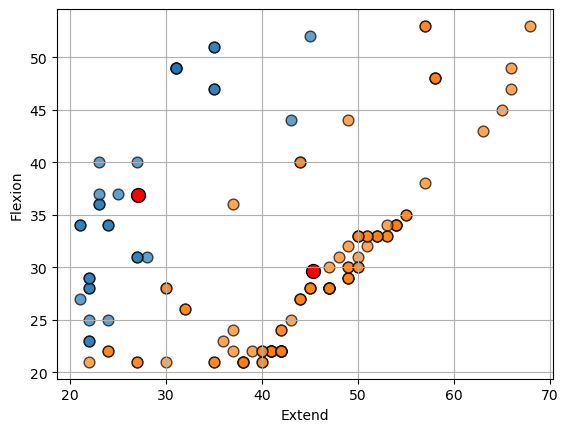

In [218]:
# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_norm_feed, emg2_norm_feed)

ex_x, ex_y = find_ex_data(emg1_norm_feed, emg2_norm_feed)

# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)

total_mean_x = mean(emg1_norm_feed)
total_mean_y = mean(emg2_norm_feed)

print("flex data")
print(flex_x)
print(flex_y)

print("ex data")
print(ex_x)
print(ex_y)


# plt.scatter(emg1_norm_feed, emg2_norm_feed, s=60, alpha=0.7, edgecolors="k")

plt.scatter(flex_x, flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(ex_x, ex_y, s=60, alpha=0.7, edgecolors="k")
# plot mean values as one red point
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)

# mean magnitude for flex and extension
TTA2_mean_mag_flex_feed = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
TTA2_mean_mag_ex_feed = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
TTA2_total_mean_feed = m.sqrt(total_mean_x**2 + total_mean_y**2)

print("TTA 2 with feedback")
print(f"Mean magnitude of flexion: {TTA2_mean_mag_flex_feed}")
print(f"Mean magnitude of extension: {TTA2_mean_mag_ex_feed}")
print(f"Total mean magnitude of co-contraction: {TTA2_total_mean_feed}")



plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Barplot

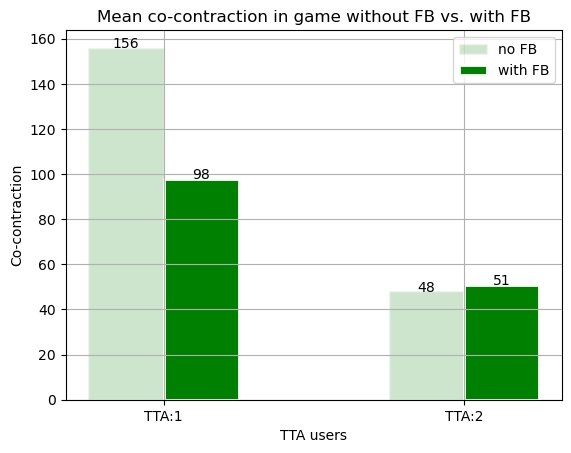

In [219]:
no_feed = [round(TTA1_total_mean), round(TTA2_total_mean)]
with_feed = [round(TTA1_total_mean_feed), round(TTA2_total_mean_feed)]

subject_list = ["TTA:1","TTA:2"]


# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], list[i], ha = 'center')


width = 0.25

r_nofeed = [1,2]
r_feed = [x + width for x in r_nofeed]
# r1_feed = [1.5,3.5]

r_middle = [x + 0.5*width for x in r_nofeed]

plt.bar(r_nofeed, no_feed, color = "g", alpha = 0.2,  width = width, edgecolor = 'white', linewidth = 2, label="no FB")
plt.bar(r_feed, with_feed, color = "g",     width = width, edgecolor = 'white', linewidth = 2, label = "with FB")

addvalue(r_nofeed, no_feed)
addvalue(r_feed, with_feed)

plt.xlabel("TTA users") 
plt.ylabel("Co-contraction")  
plt.xticks(r_middle ,subject_list) 

# plt.ylim(0,20)
plt.legend(loc = "upper right")
plt.title("Mean co-contraction in game without FB vs. with FB")
plt.grid()
plt.show()


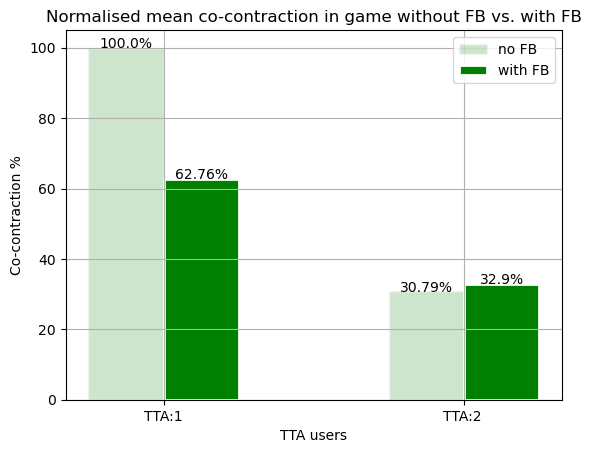

In [220]:
# red = decrease in co-contraction, green = increase in co-contraction
# Normalised
no_feed = [round(TTA1_total_mean/TTA1_total_mean*100,2), round(TTA2_total_mean/TTA1_total_mean*100,2)]
with_feed = [round(TTA1_total_mean_feed/TTA1_total_mean*100,2), round(TTA2_total_mean_feed/TTA1_total_mean*100,2)]



subject_list = ["TTA:1","TTA:2 "]


# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], f"{list[i]}%", ha = 'center')


width = 0.25

r_nofeed = [1,2]
r_feed = [x + width for x in r_nofeed]
# r1_feed = [1.5,3.5]

r_middle = [x + 0.5*width for x in r_nofeed]

plt.bar(r_nofeed, no_feed, color = "g", alpha = 0.2,  width = width, edgecolor = 'white', linewidth = 2, label="no FB")
plt.bar(r_feed, with_feed, color = "g",     width = width, edgecolor = 'white', linewidth = 2, label = "with FB")

addvalue(r_nofeed, no_feed)
addvalue(r_feed, with_feed)

plt.xlabel("TTA users") 
plt.ylabel("Co-contraction %")  
plt.xticks(r_middle ,subject_list) 

# plt.ylim(0,20)
plt.legend(loc = "upper right")
plt.title("Normalised mean co-contraction in game without FB vs. with FB")
plt.grid()
plt.show()


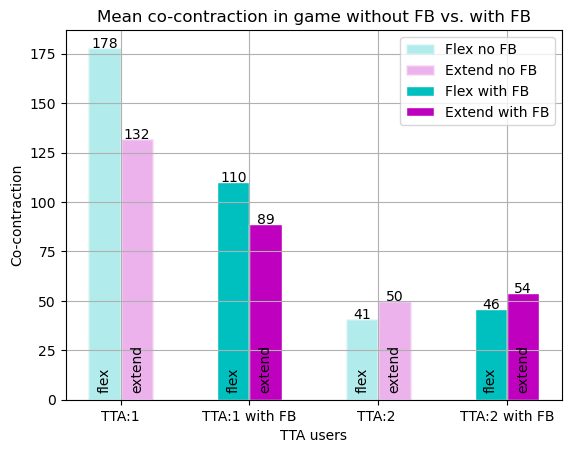

In [221]:
# no_feed = [mean_TTA1, mean_TTA2]
# with_feed = [mean_TTA1_feed, mean_TTA2_feed]

# flexion for TTA1 and TTA2 no FB
flex_1_2 = [round(TTA1_mean_mag_flex), round(TTA2_mean_mag_flex)]
# Extension for TTA1 and TTA2 no FB
ex_1_2 = [round(TTA1_mean_mag_ex), round(TTA2_mean_mag_ex)]
# flexion for TTA1 and TTA2 with FB
flex_1_2_feed = [round(TTA1_mean_mag_flex_feed), round(TTA2_mean_mag_flex_feed)]
# Extension for TTA1 and TTA2 with FB
ex_1_2_feed = [round(TTA1_mean_mag_ex_feed), round(TTA2_mean_mag_ex_feed)]
subject_list = ["TTA:1", "TTA:1 with FB", "TTA:2 ", "TTA:2 with FB"]

# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 5, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 5, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], list[i], ha = 'center')

width = 0.25

r = [1,2,3,4]
r_flex = [1,3]
r_ex = [x + width for x in r_flex]

r_flex_feed = [2,4]
r_ex_feed = [x + width for x in r_flex_feed]

r_middle = [x + 0.5*width for x in r]


plt.bar(r_flex, flex_1_2, color = "c", alpha = 0.3,  width = width, edgecolor = 'white', linewidth = 2, label="Flex no FB")
plt.bar(r_ex, ex_1_2, color = "m",     alpha = 0.3,   width = width, edgecolor = 'white', linewidth = 2, label = "Extend no FB")


plt.bar(r_flex_feed, flex_1_2_feed , color = "c",    width = width, edgecolor = 'white', label = "Flex with FB")
plt.bar(r_ex_feed, ex_1_2_feed ,     color = "m",    width = width, edgecolor = 'white', label = "Extend with FB")


addlabel_flex(r_flex, flex_1_2)
addlabel_flex(r_flex_feed, flex_1_2_feed)

addlabel_ex(r_ex, ex_1_2)
addlabel_ex(r_ex_feed, ex_1_2)

addvalue(r_flex, flex_1_2)
addvalue(r_flex_feed, flex_1_2_feed)
addvalue(r_ex, ex_1_2)
addvalue(r_ex_feed, ex_1_2_feed)

plt.xlabel("TTA users") 
plt.ylabel("Co-contraction")  
plt.xticks(r_middle ,subject_list) 

# plt.ylim(0,20)
plt.legend(loc = "upper right")
plt.title("Mean co-contraction in game without FB vs. with FB")
plt.grid()
plt.show()
